**Step 1: Setup and Installation**

First, install the necessary libraries in your Colab notebook:

In [1]:
!pip install transformers
!pip install scikit-learn

**Step 2: Import Libraries**

Import the required libraries:

In [2]:
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import torch


**Step 3: Load and Prepare Data**

For simplicity, let's use a small set of sample sentences. In a real scenario, you would replace this with your document data.

In [3]:
documents = [
    "The cat sat on the mat.",
    "Dogs are better than cats.",
    "I love pizza.",
    "The sky is blue.",
    "I enjoy reading about machine learning."
]


**Step 4: Generate Embeddings**

Load a pretrained model and tokenizer, then generate embeddings for each document:

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()

embeddings = np.array([get_embedding(doc) for doc in documents])


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**Step 5: Clustering**

Apply a clustering algorithm, such as K-Means, to the embeddings:

In [5]:
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Step 6: Visualize Clusters**

Since BERT embeddings are high-dimensional, use PCA for dimensionality reduction to visualize the clusters:

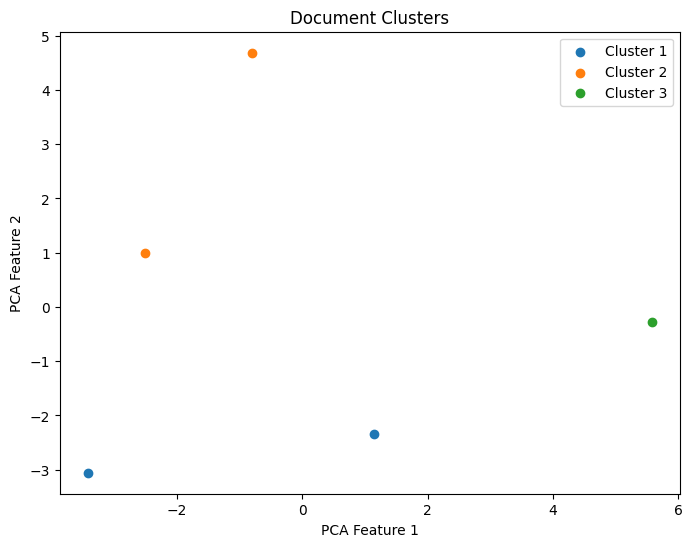

In [6]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(reduced_embeddings[clusters == i, 0], reduced_embeddings[clusters == i, 1], label=f"Cluster {i+1}")
plt.title("Document Clusters")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend()
plt.show()
